In [1]:
import numpy as np # funções matemáticas
import matplotlib.pyplot as plt # plot dos gráficos (visualização)

In [2]:
def bissec(f, a, b, tol = 1e-4, maxIt = 50):

    # Verificar condição de existencia de raiz no intervalo
    if f(a)*f(b) > 0:
        print("O intervalo dado é inválido")
        return None, 0 # retorna nenhuma raiz
    
        # alternativamente, podemos lançar uma exceção
        # raise ValueError(f"O intervalo [{a}, {b}] é inválido para essa função")

    # Verifica se os extremos do intervalo são raízes
    if np.abs(f(a)) < tol:
        return a,0
    if np.abs(f(b)) < tol:
        return b,0
    
    for it in range(maxIt): # for(int it = 0; it < maxIt; it++)

        x = (a+b)/2 # Realiza a iteração (calcula o ponto médio)

        # Verifica se resultado é próximo suficiente da raiz
        if np.abs(f(x)) < tol:
            return x, it+1
        
        # Determina novo intervalo
        if f(x)*f(a) < 0:
            b = x # intervalo [a,x]
        else:
            a = x # intervalo [x,b]

    # Caso não haja convergência no limite de iterações definido:
    print('Numero max de iterações foi atingido')
    return x, maxIt

In [3]:
# Definição da função não-linear e sua derivada
def f(x):
    return x**3 - x**2 + x - 1.5

def df(x):
    return 3*x**2 - 2*x + 1

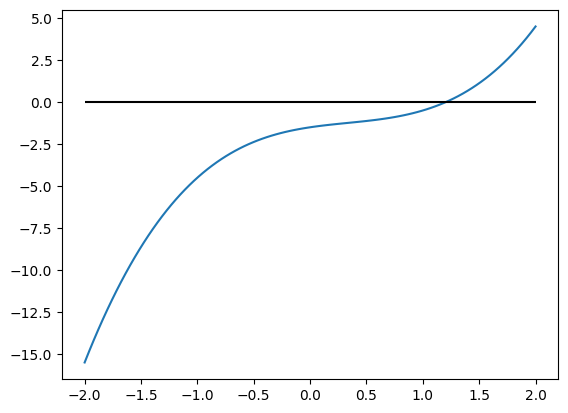

In [4]:
# Podemos utilziar representações gráficas da função para determinar um intervalo de busca

# intervalo de visualização
a = -2
b = 2

#plota intervalo par visualização
pts = np.linspace(a, b, 100)
plt.plot(pts, f(pts))
plt.hlines(0,a,b,'k')

In [5]:
# Execução do algorítimo
x, it = bissec(f, a, b)
print(f'A solução aproximada encontrada foi x = {x};\nValor f(x) = {f(x)};\nForam necessárias {it} iterações')

A solução aproximada encontrada foi x = 1.2041015625;
Valor f(x) = 2.037081867456436e-05;
Foram necessárias 12 iterações


In [6]:
def newton(f,df, x, tol = 1e-4, maxIt=50):
    for it in range(maxIt):
        if np.abs(f(x)) < tol:
            return x, it
        if df(x) == 0:
            print("Erro: df(x) = 0")
            return x, it
            # Alternativamente:
            # raise ValueError(f"A derivada em x = {x} é 0")
        x = x - f(x)/df(x)
    print('Numero max de iterações foi atingido')
    return x, maxIt
    

In [7]:
# Execução do algorítimo
x0 = a
x, it = newton(f, df, x0)
print(f'A solução aproximada encontrada foi x = {x};')
print(f'Valor f(x) = {f(x)};')
print(f'Foram necessárias {it} iterações com chute inicial x0 = {x0}')

A solução aproximada encontrada foi x = 1.2040946589829138;
Valor f(x) = 6.508579586395058e-08;
Foram necessárias 8 iterações com chute inicial x0 = -2
